# Employee Attrition ML
Sudhanshu Pawar


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
Employee = pd.read_csv("emp.csv")

In [4]:
Employee.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [5]:
print(Employee.keys())

Index(['Employee Count', 'Employee ID', 'Department', 'Job Role', 'Gender',
       'Age', 'Marital Status', 'Education', 'Education Field',
       'Business Travel', 'Distance From Home (kms)', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'Over Time',
       'No. of Companies Worked', 'Total Working Years', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Environment Satisfaction',
       'Training Times Last Year', 'Work Life Balance',
       'Relationship Satisfaction', 'Attrition (Yes/No)'],
      dtype='object')


In [6]:
Employee.shape

(1470, 29)

# EDA

In [7]:
Employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee Count,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Employee ID,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Distance From Home (kms),1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Job Level,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
Monthly Income (USD),1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
Salary Hike (%),1470.0,14.951701,3.533904,10.0,12.00,14.0,17.00,25.0
Stock Option Level,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0
No. of Companies Worked,1470.0,2.689116,2.494231,0.0,1.00,2.0,4.00,9.0
Total Working Years,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0


In [8]:
Employee.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [9]:
Employee.rename(columns = {'Attrition (Yes/No)':'Attrition'}, inplace = True)

In [10]:
Employee.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [11]:
attrition_count = pd.DataFrame(Employee['Attrition'].value_counts())

In [12]:
attrition_count

,Attrition
No,1233
Yes,237


Text(0.5, 1.0, 'Employee Attrition Count ')

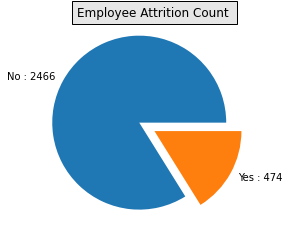

In [45]:
plt.pie(attrition_count['Attrition'] , labels =['No : 2466','Yes : 474'] , explode=(0.2,0))
plt.title('Employee Attrition Count ', bbox={'facecolor':'0.9', 'pad':5})

In [14]:
corr = Employee.corr()
corr.shape

(15, 15)

In [15]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

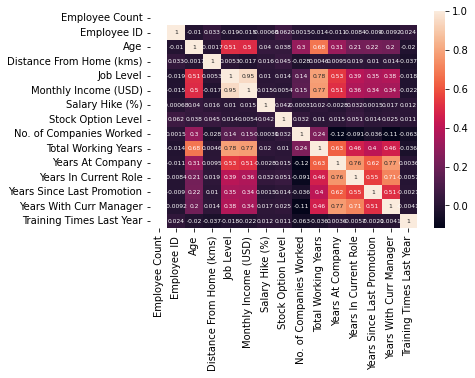

In [16]:
sns.heatmap(Employee.corr() , annot=True , annot_kws={'size':6})

Text(0.5, 1.0, 'Employee Attrition Count')

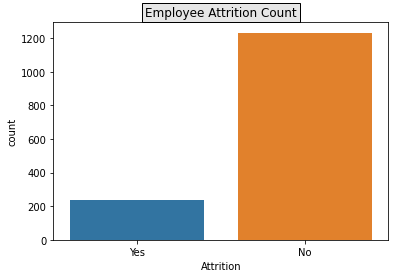

In [17]:
sns.countplot(Employee['Attrition'])
plt.title('Employee Attrition Count', bbox={'facecolor':'0.9', 'pad':3})

In [18]:
Employee.drop(['Employee Count','Employee ID'],axis=1)

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,No
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,No
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,23,Very High,...,17,5,2,0,3,High,3,Better,High,No
1466,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,6,Medium,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,4,Very High,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,2,Medium,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [19]:
attrition_dummies = pd.get_dummies(Employee['Attrition'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [20]:
Employee=pd.concat([Employee, attrition_dummies],axis=1)
Employee.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition,No,Yes
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,4,0,5,Medium,0,Bad,Low,Yes,0,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,7,1,7,High,3,Better,Very High,No,1,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,0,0,0,Low,3,Bad,Medium,Yes,0,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,7,3,0,Very High,3,Better,High,No,1,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,2,2,2,Low,3,Better,Very High,No,1,0


In [21]:
Employee = Employee.drop(['Attrition','No'],axis=1)

In [22]:
Employee.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Yes
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,0


Text(0.5, 1.0, 'Male / Female Attrition')

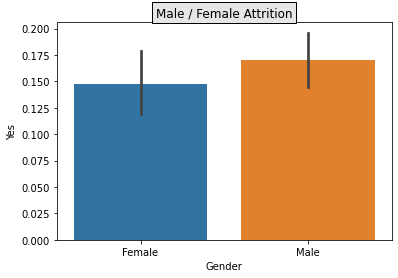

In [23]:
sns.barplot(x='Gender',y='Yes',data=Employee)
plt.title('Male / Female Attrition', bbox={'facecolor':'0.9','pad':4})

Text(0.5, 1.0, 'Departmentwise Attrition')

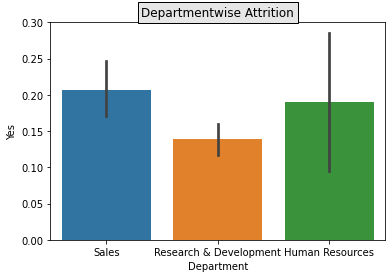

In [24]:
sns.barplot(x='Department', y='Yes',data = Employee)
plt.title('Departmentwise Attrition',bbox={'facecolor':'0.9','pad':4} )

Text(0.5, 1.0, 'Bussiness Travel Attrition ')

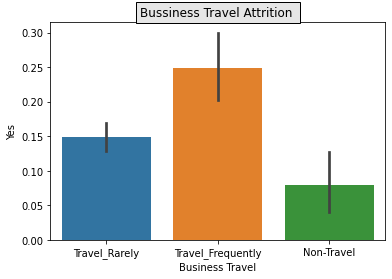

In [25]:
sns.barplot(x='Business Travel',y='Yes',data = Employee)
plt.title('Bussiness Travel Attrition ', bbox={'facecolor':'0.9', 'pad':4})

<AxesSubplot:xlabel='Years At Company', ylabel='count'>

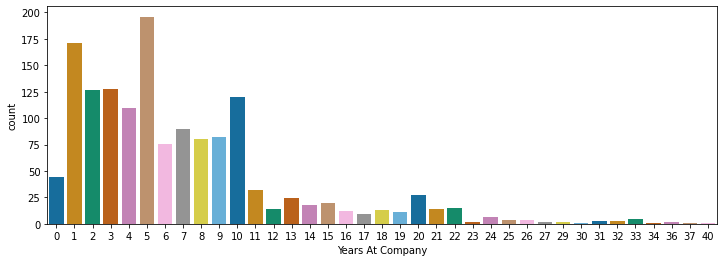

In [26]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Years At Company',data=Employee,palette='colorblind')

<AxesSubplot:xlabel='Age', ylabel='count'>

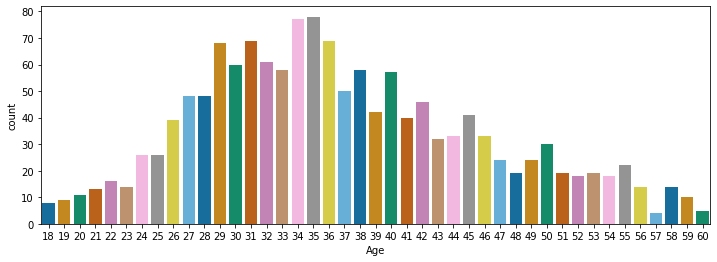

In [27]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',data=Employee ,palette='colorblind')

# Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
for column in Employee.columns:
    if Employee[column].dtype==np.number:
        continue
    else:
        Employee[column]=LabelEncoder().fit_transform(Employee[column])

# Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state = 0)

In [30]:
x = Employee.drop(['Yes'],axis=1)
y = Employee['Yes']

In [31]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
x_train.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
338,0,338,2,7,0,12,0,0,2,2,...,1,10,10,9,1,2,3,2,2,0
363,0,363,2,8,0,15,2,0,2,2,...,1,1,1,0,0,0,3,2,0,2
759,0,759,0,1,1,27,2,4,3,2,...,1,6,6,3,0,4,2,3,2,1
793,0,793,1,2,1,10,0,2,1,2,...,1,4,4,2,2,2,1,5,3,3
581,0,581,1,2,1,12,1,0,1,2,...,3,7,2,2,0,2,3,2,2,0


In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
rf.score(x_train,y_train)

0.9922254616132167

# Prediciton

In [35]:
pred=rf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,pred)

0.8775510204081632

Hence, acccuracy for tested data= 87.75

# Improving Accuracy

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy',random_state =0)

In [40]:
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
print(x_train)

      Employee Count  Employee ID  Department  Job Role  Gender  Age  \
338                0          338           2         7       0   12   
363                0          363           2         8       0   15   
759                0          759           0         1       1   27   
793                0          793           1         2       1   10   
581                0          581           1         2       1   12   
...              ...          ...         ...       ...     ...  ...   
763                0          763           2         8       0   16   
835                0          835           0         1       1   17   
1216               0         1216           2         7       1   25   
559                0          559           1         6       1   20   
684                0          684           2         7       1   22   

      Marital Status  Education  Education Field  Business Travel  ...  \
338                0          0                2             

In [42]:
score = forest.score(x_train,y_train)
print('randomforest classifier', np.abs(score)*100)

randomforest classifier 99.22254616132167


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forest.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Model Testing Accuracy is - ',(TP+TN)/(TP+TN+FP+FN))
print('Misclassification Rate - ',(FP+FN)/(TP+TN+FP+FN))
print('Precission Rate - ',(TP)/(TP+FP))
print('Recall Rate - ',(TP)/(TP+FN))

[[364   7]
 [ 47  23]]
Model Testing Accuracy is -  0.8775510204081632
Misclassification Rate -  0.12244897959183673
Precission Rate -  0.7666666666666667
Recall Rate -  0.32857142857142857


# Classifier Score = 99.22254616132167

## end